In [1]:
### 데이터 처리
import pandas as pd

### 시각화 처리
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False 

#### 데이터 파일 준비

- data_20table_org : 분석할 데이터 파일 원본
- data_20table_trans_org1 : 데이터 변수 테이블
- data_20table_trans_org2 : 진료과목 변수 테이블

- data_20table_org_kor : 컬럼명 한글, 분석할 데이터 파일
- data_20table_org_kor_fin : 진료과목명 추가 된 최종파일


In [2]:
# 분석할 데이터 파일 읽기 원본
file_path1 = "./files_org/SAMPLE_DB_20TABLE_2013.txt"
data_20table_org = pd.read_csv(file_path1, sep=",")

# 표본자료 변수 테이블 읽기
file_path2 = "./files_org/표본자료 변수 테이블(2012-2013).xlsx"
data_20table_trans_org1 = pd.read_excel(file_path2, 
                                       sheet_name="20table_명세서일반내역",
                                       usecols="A,D")

# 진료과목코드 변수 테이블 읽기
file_path3 = "./files_org/표본자료 변수 테이블(2012-2013).xlsx"
data_20table_trans_org2 = pd.read_excel(file_path2, 
                                       sheet_name="진료과목명",
                                       usecols="A,B")


In [3]:
## 컬럼명 변경
data_org_dict1 = dict(zip(data_20table_trans_org1["변수명"], data_20table_trans_org1["표준한글컬럼명"]))

## 컬럼명 한글로 변경
data_20table_org_kor = data_20table_org.rename(columns=data_org_dict1)

In [4]:
## 변경된 데이터 확인
data_20table_org_kor

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,1,9430,2800,6630,0,$,$,$,$,30796
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,1,4380,500,3880,0,$,$,$,$,9795
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1,3310,1300,2010,0,$,$,$,$,34835
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,1,26660,7900,18760,0,$,$,$,$,35538
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,1,9430,2800,6630,0,$,$,$,$,4665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,1,13310,3900,9410,0,$,$,$,$,21762
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,1,71310,3500,67810,0,V193,$,$,$,45362
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,1,13820,2900,10920,0,$,$,$,$,12083
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,1,9430,2800,6630,0,$,$,$,$,21067


In [5]:
# 진료과목 코드 -> 진료과목명으로 변경

data_20table_org_kor_fin = pd.merge(left=data_20table_org_kor,
                                                            right=data_20table_trans_org2,
                                                            how="inner",
                                                            left_on="진료과목코드",
                                                            right_on="진료과목코드")

In [6]:
data_20table_org_kor_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5631 entries, 0 to 5630
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   명세서 연결코드    5631 non-null   int64  
 1   수진자고유번호     5631 non-null   int64  
 2   청구형태코드      5631 non-null   int64  
 3   청구구분코드      5631 non-null   int64  
 4   서식코드        5631 non-null   int64  
 5   연령군         5631 non-null   int64  
 6   추출확률        5631 non-null   float64
 7   샘플가중치       5631 non-null   float64
 8   수진자연령       5631 non-null   float64
 9   성별구분코드      5631 non-null   int64  
 10  보험자코드       5631 non-null   int64  
 11  주상병코드       5631 non-null   object 
 12  부상병코드       5631 non-null   object 
 13  요양개시일자      5631 non-null   int64  
 14  요양만료일자      5527 non-null   float64
 15  진료결과구분코드    5631 non-null   int64  
 16  진료과목코드      5631 non-null   int64  
 17  청구DRG번호     5631 non-null   object 
 18  최초입원일자      64 non-null     float64
 19  입원도착경로구분코드  5631 non-null  

In [7]:
## 최종 파일 확인
data_20table_org_kor_fin

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,진료과목명
0,1,169,3,0,3,13,0.030001,33.332599,62.0,1,...,9430,2800,6630,0,$,$,$,$,30796,내과
1,2,183,3,0,8,15,0.030000,33.332882,74.0,2,...,4380,500,3880,0,$,$,$,$,9795,일반의
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,3310,1300,2010,0,$,$,$,$,34835,정신과
3,4,96,3,0,5,14,0.030000,33.333002,68.0,1,...,26660,7900,18760,0,$,$,$,$,35538,치주과
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,9430,2800,6630,0,$,$,$,$,4665,내과
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,13310,3900,9410,0,$,$,$,$,21762,구강내과
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,71310,3500,67810,0,V193,$,$,$,45362,내과
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,1,...,13820,2900,10920,0,$,$,$,$,12083,소아청소년과
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,2,...,9430,2800,6630,0,$,$,$,$,21067,정형외과


#### 연령별 데이터 필터링

In [8]:
# 수진자 연령군 기준 (총 16군, 4군씩 묶음)으로 필터링(컬럼 추가)

data_20table_org_kor_fin["연령기준"] = "없음"

for idx in range(len(data_20table_org_kor_fin["연령군"])) :
    if data_20table_org_kor_fin["연령군"][idx] > 12 :
        data_20table_org_kor_fin.loc[idx, "연령기준"] = "노년"
    elif data_20table_org_kor_fin["연령군"][idx] > 8 :
        data_20table_org_kor_fin.loc[idx, "연령기준"] = "중년"
    elif data_20table_org_kor_fin["연령군"][idx] > 4 :
        data_20table_org_kor_fin.loc[idx, "연령기준"] = "청년"
    else :
        data_20table_org_kor_fin.loc[idx, "연령기준"] = "미성년"

In [9]:
## 연령기준 미성년 데이터만 샘플 필터링

age = data_20table_org_kor_fin["연령기준"] == "미성년"
age_20table = data_20table_org_kor_fin[age]

age_20table

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,진료과목명,연령기준
2,3,23,3,0,3,3,0.030000,33.332920,14.0,1,...,1300,2010,0,$,$,$,$,34835,정신과,미성년
4,5,28,3,0,3,4,0.030001,33.332721,19.0,1,...,2800,6630,0,$,$,$,$,4665,내과,미성년
5,6,198,3,0,3,4,0.030000,33.333333,15.0,2,...,3900,9290,0,$,$,$,$,25732,피부과,미성년
6,7,197,3,0,3,1,0.030000,33.333050,3.0,1,...,2900,10930,0,$,$,$,$,33606,가정의학과,미성년
11,12,115,3,0,3,2,0.030000,33.333011,6.0,1,...,2800,6630,0,$,$,$,$,47527,내과,미성년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,5614,197,3,0,3,1,0.030000,33.333050,3.0,1,...,2000,7680,0,$,$,$,$,33606,예방의학과,미성년
5625,5626,277,3,0,3,2,0.030000,33.332844,10.0,2,...,1400,3310,0,$,$,$,$,12659,소아청소년과,미성년
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,2,...,3900,9410,0,$,$,$,$,21762,구강내과,미성년
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,1,...,3500,67810,0,V193,$,$,$,45362,내과,미성년


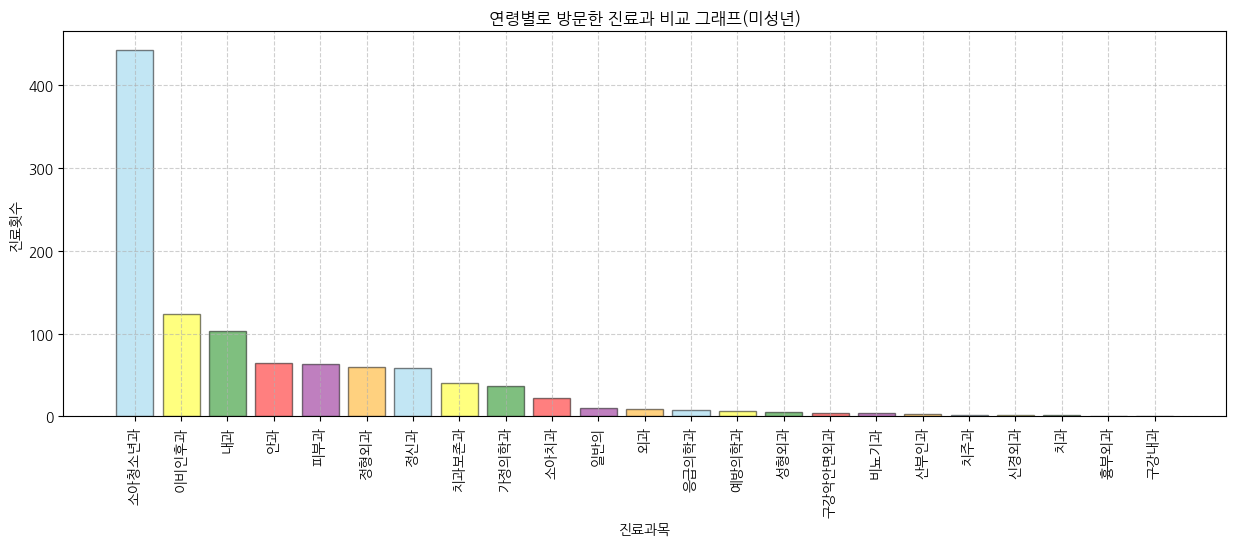

In [10]:
## 샘플 그래프 그리기

# 그래프 사이즈
plt.figure(figsize=(15, 5))

# 그래프 제목
plt.title("연령별로 방문한 진료과 비교 그래프(미성년)")

# x축 y축 이름 넣기
plt.xlabel("진료과목")
plt.ylabel("진료횟수")

# 진료과목코드별 횟수를 계산
counts = age_20table["진료과목명"].value_counts()

# 선 그래프 (X: 진료과목코드, Y: 코드별 횟수)
plt.bar(counts.index, counts.values,
        # - edgecolor : 막대 그래프 테두리 색상 지정
        edgecolor="black",
        # - 투명도 : 막대 그래프 내부 투명도 0~1 사이 값 사용
        alpha=0.5,
        # - 막대 그래프 각각의 색 지정
        color=["skyblue", "yellow", "green", "red", "purple", "orange"]
        )

# x축 범위 재정의
xList = list(range(0, 23))
plt.xticks(xList, rotation=90)

### 모눈선 그리기
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.show()

#### 성별별 데이터 필터링

- "1"은 남성, "2"는 여성 "9"는 기타

In [11]:
data_20table_org_kor_fin["성별구분코드"].unique()

array([1, 2], dtype=int64)

In [12]:
## 성별 구분 코드 수정
# - 1은 남성, 2는 여성, 9는 기타
# - data_20table_org_kor_fin["성별구분코드"].unique() 확인 시 1, 2만 있음

# 성별구분코드가 1인 경우 "남성", 2인 경우 "여성"으로 수정
data_20table_org_kor_fin.loc[data_20table_org_kor_fin["성별구분코드"] == 1, data_20table_org_kor_fin.columns[9]] = "남성"
data_20table_org_kor_fin.loc[data_20table_org_kor_fin["성별구분코드"] == 2, data_20table_org_kor_fin.columns[9]] = "여성"

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5760\3746968371.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '남성' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_20table_org_kor_fin.loc[data_20table_org_kor_fin["성별구분코드"] == 1, data_20table_org_kor_fin.columns[9]] = "남성"


In [13]:
# 처리결과 확인
data_20table_org_kor_fin

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,진료과목명,연령기준
0,1,169,3,0,3,13,0.030001,33.332599,62.0,남성,...,2800,6630,0,$,$,$,$,30796,내과,노년
1,2,183,3,0,8,15,0.030000,33.332882,74.0,여성,...,500,3880,0,$,$,$,$,9795,일반의,노년
2,3,23,3,0,3,3,0.030000,33.332920,14.0,남성,...,1300,2010,0,$,$,$,$,34835,정신과,미성년
3,4,96,3,0,5,14,0.030000,33.333002,68.0,남성,...,7900,18760,0,$,$,$,$,35538,치주과,노년
4,5,28,3,0,3,4,0.030001,33.332721,19.0,남성,...,2800,6630,0,$,$,$,$,4665,내과,미성년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9.0,여성,...,3900,9410,0,$,$,$,$,21762,구강내과,미성년
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,남성,...,3500,67810,0,V193,$,$,$,45362,내과,미성년
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,남성,...,2900,10920,0,$,$,$,$,12083,소아청소년과,미성년
5629,5630,253,3,0,3,10,0.030000,33.332913,47.0,여성,...,2800,6630,0,$,$,$,$,21067,정형외과,중년


In [14]:
## 성별 기준 남성 데이터만 샘플 필터링

sex = data_20table_org_kor_fin["성별구분코드"] == "남성"
sex_20table = data_20table_org_kor_fin[sex]

sex_20table

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,진료과목명,연령기준
0,1,169,3,0,3,13,0.030001,33.332599,62.0,남성,...,2800,6630,0,$,$,$,$,30796,내과,노년
2,3,23,3,0,3,3,0.030000,33.332920,14.0,남성,...,1300,2010,0,$,$,$,$,34835,정신과,미성년
3,4,96,3,0,5,14,0.030000,33.333002,68.0,남성,...,7900,18760,0,$,$,$,$,35538,치주과,노년
4,5,28,3,0,3,4,0.030001,33.332721,19.0,남성,...,2800,6630,0,$,$,$,$,4665,내과,미성년
6,7,197,3,0,3,1,0.030000,33.333050,3.0,남성,...,2900,10930,0,$,$,$,$,33606,가정의학과,미성년
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,5619,127,3,0,5,9,0.030000,33.333021,45.0,남성,...,13900,32550,0,$,$,$,$,20633,치과보존과,중년
5621,5622,154,3,0,3,10,0.030000,33.333047,47.0,남성,...,4100,9780,0,$,$,$,$,34063,피부과,중년
5627,5628,295,3,0,3,4,0.030001,33.332721,20.0,남성,...,3500,67810,0,V193,$,$,$,45362,내과,미성년
5628,5629,246,3,0,3,1,0.030000,33.333050,4.0,남성,...,2900,10920,0,$,$,$,$,12083,소아청소년과,미성년


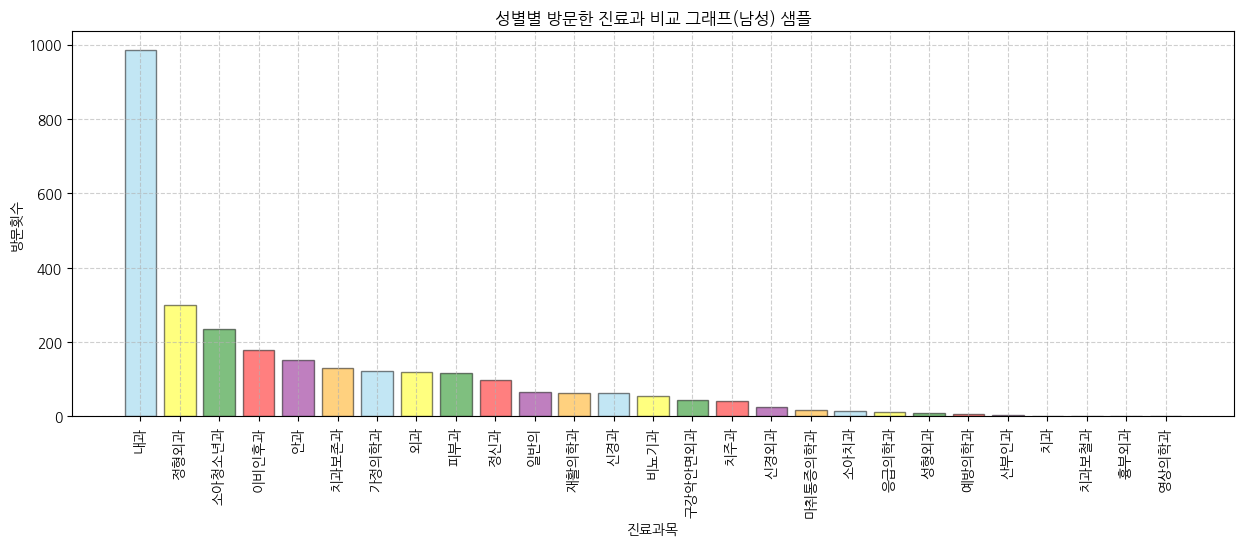

In [15]:
## 샘플 그래프 그리기

# 그래프 사이즈
plt.figure(figsize=(15, 5))

# 그래프 제목
plt.title("성별별 방문한 진료과 비교 그래프(남성) 샘플")

# x축 y축 이름 넣기
plt.xlabel("진료과목")
plt.ylabel("방문횟수")

# 진료과목코드별 횟수를 계산
counts = sex_20table["진료과목명"].value_counts()

# 선 그래프 (X: 진료과목코드, Y: 코드별 횟수)
plt.bar(counts.index, counts.values,
        # - edgecolor : 막대 그래프 테두리 색상 지정
        edgecolor="black",
        # - 투명도 : 막대 그래프 내부 투명도 0~1 사이 값 사용
        alpha=0.5,
        # - 막대 그래프 각각의 색 지정
        color=["skyblue", "yellow", "green", "red", "purple", "orange"]
        )

# x축 범위 재정의
plt.xticks(range(len(counts.index)), counts.index, rotation=90)

### 모눈선 그리기
plt.grid(True, linestyle='--', alpha=0.6)

# 그래프 표시
plt.show()

#### 연령별로 방문한 진료과 비교 그래프

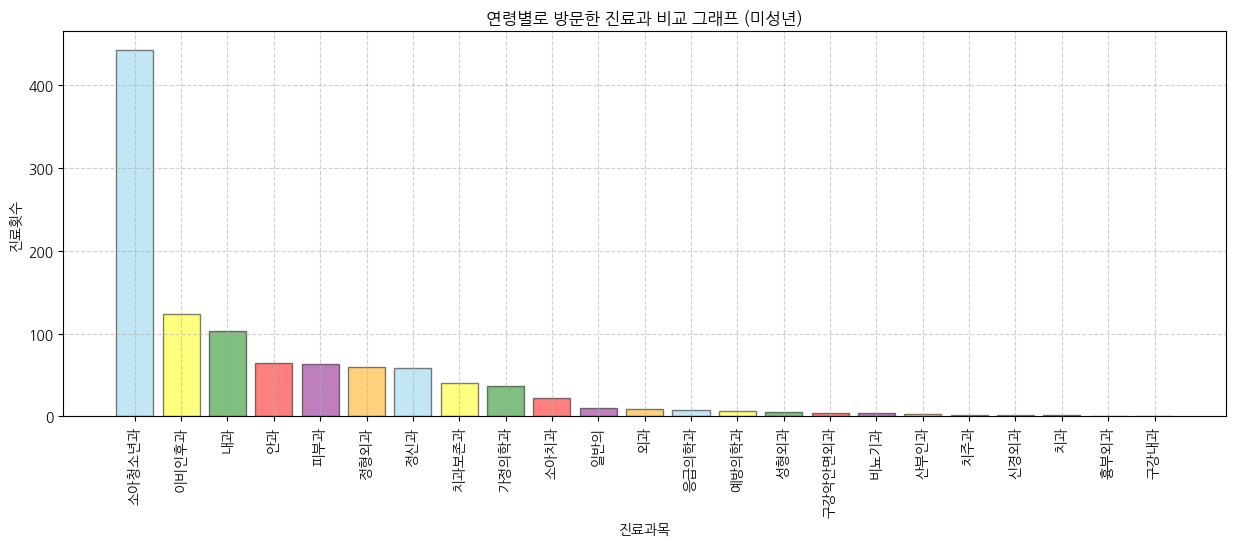

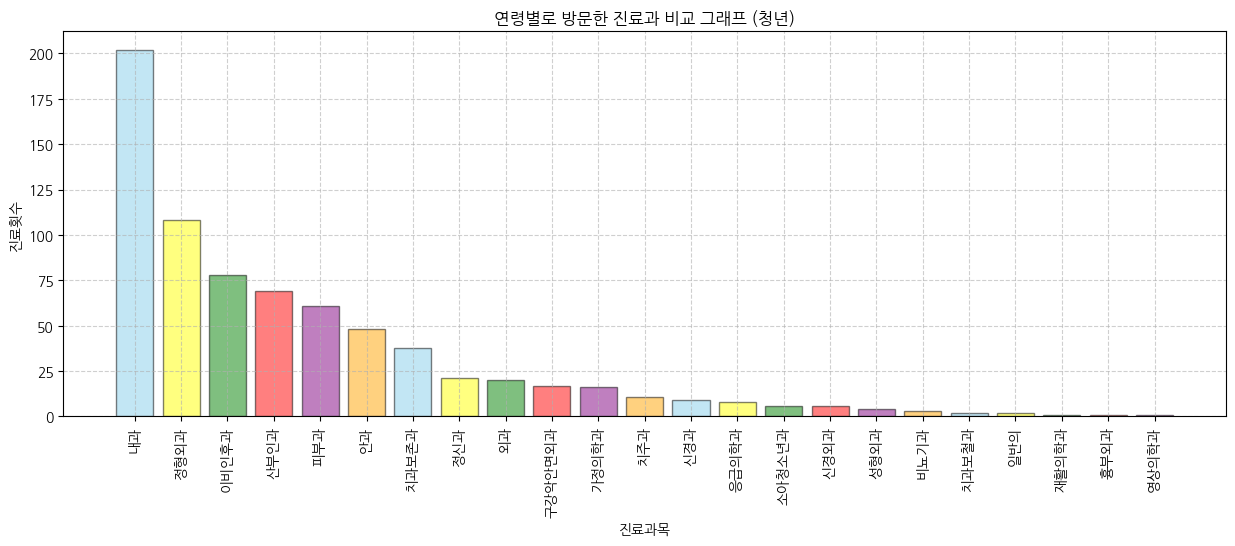

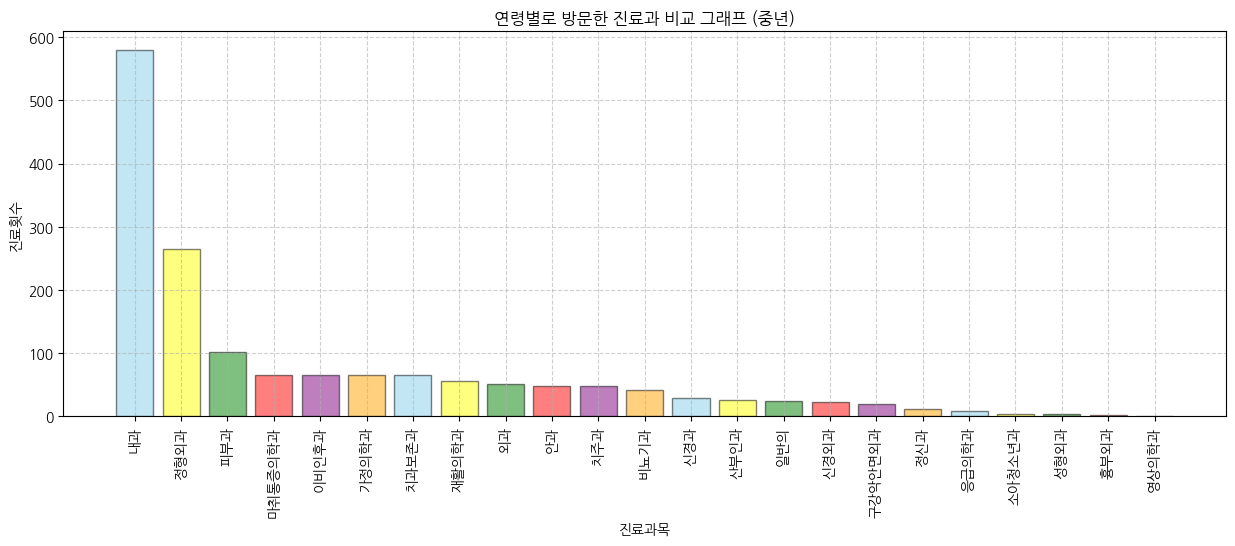

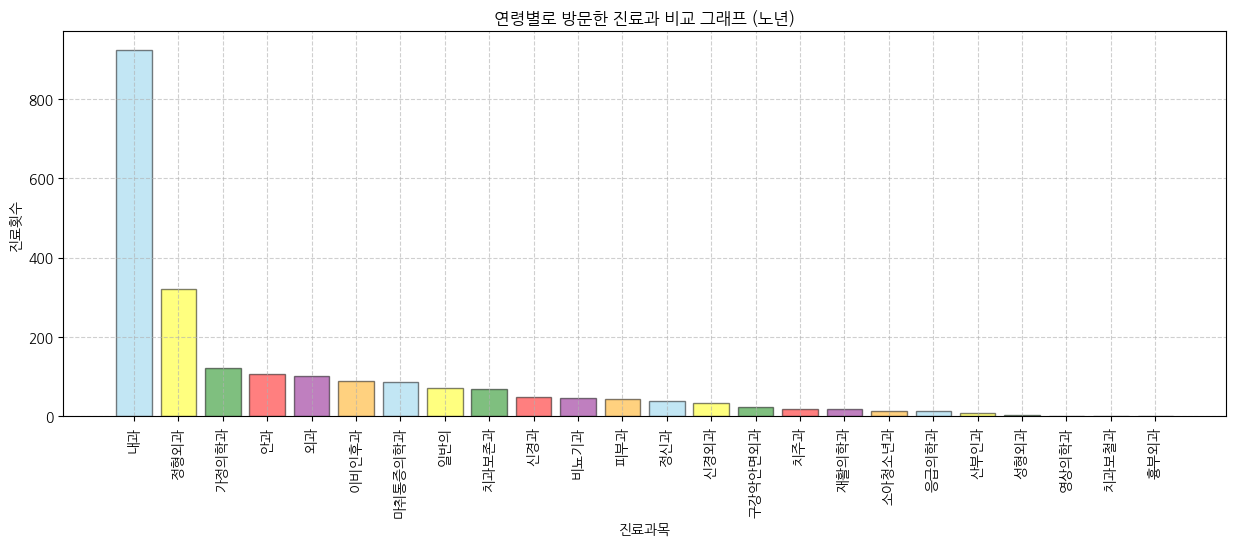

In [16]:
### 최종 그래프 그리기

age_list = ["미성년", "청년", "중년", "노년"]

for nm in age_list :
    age_filter = data_20table_org_kor_fin[data_20table_org_kor_fin["연령기준"] == nm]

    # 그래프 사이즈
    plt.figure(figsize=(15, 5))

    # 그래프 제목
    plt.title(f"연령별로 방문한 진료과 비교 그래프 ({nm})")

    # x축 y축 이름 넣기
    plt.xlabel("진료과목")
    plt.ylabel("진료횟수")

    # 진료과목코드별 횟수를 계산
    counts = age_filter["진료과목명"].value_counts()

    # 선 그래프 (X: 진료과목코드, Y: 코드별 횟수)
    plt.bar(counts.index, counts.values,
            # - edgecolor : 막대 그래프 테두리 색상 지정
            edgecolor="black",
            # - 투명도 : 막대 그래프 내부 투명도 0~1 사이 값 사용
            alpha=0.5,
            # - 막대 그래프 각각의 색 지정
            color=["skyblue", "yellow", "green", "red", "purple", "orange"]
            )

    # x축 범위 재정의
    plt.xticks(range(len(counts.index)), counts.index, rotation=90)

    ### 모눈선 그리기
    plt.grid(True, linestyle='--', alpha=0.6)

    # 그래프 표시
    plt.show()

#### 성별별로 방문한 진료과 비교 그래프

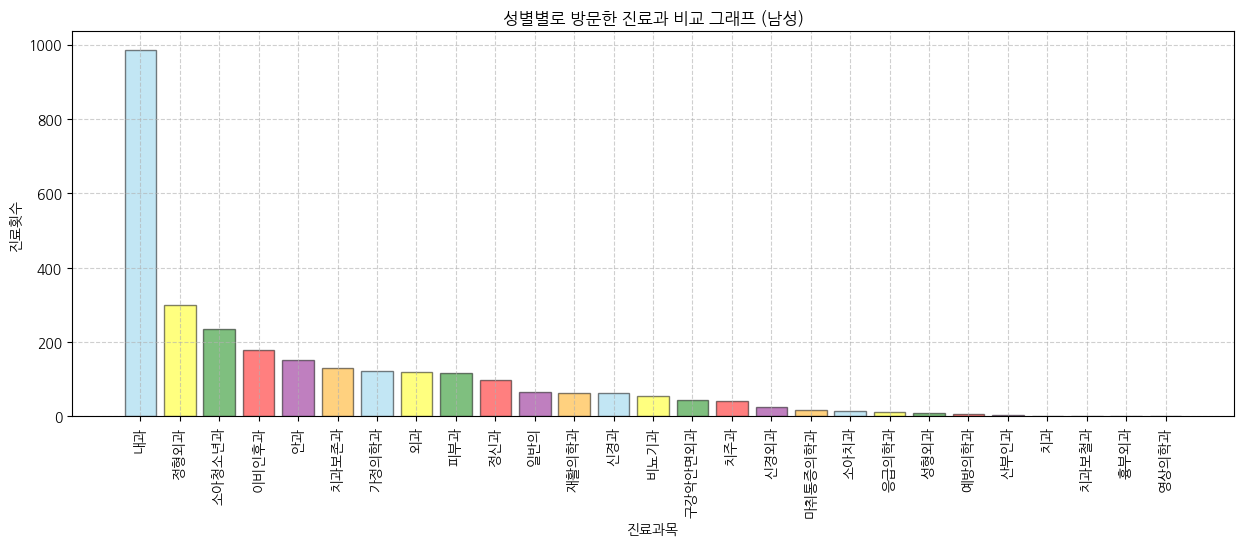

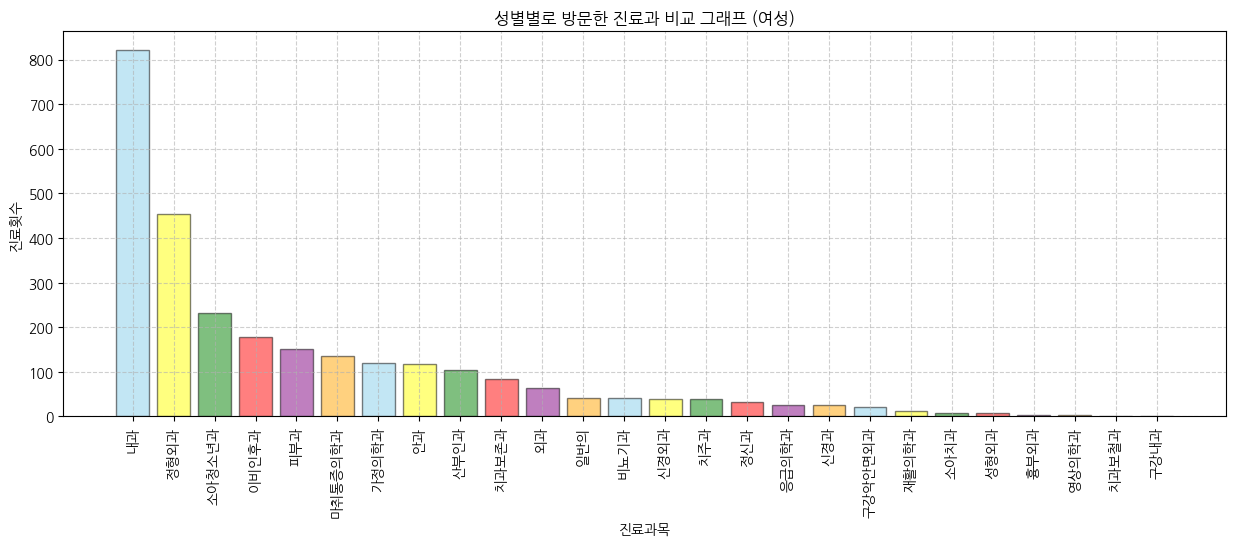

In [17]:
### 최종 그래프 그리기

for nm in data_20table_org_kor_fin["성별구분코드"].unique() :
    sex_filter = data_20table_org_kor_fin[data_20table_org_kor_fin["성별구분코드"] == nm]

    # 그래프 사이즈
    plt.figure(figsize=(15, 5))

    # 그래프 제목
    plt.title(f"성별별로 방문한 진료과 비교 그래프 ({nm})")

    # x축 y축 이름 넣기
    plt.xlabel("진료과목")
    plt.ylabel("진료횟수")

    # 진료과목코드별 횟수를 계산
    counts = sex_filter["진료과목명"].value_counts()

    # 선 그래프 (X: 진료과목코드, Y: 코드별 횟수)
    plt.bar(counts.index, counts.values,
            # - edgecolor : 막대 그래프 테두리 색상 지정
            edgecolor="black",
            # - 투명도 : 막대 그래프 내부 투명도 0~1 사이 값 사용
            alpha=0.5,
            # - 막대 그래프 각각의 색 지정
            color=["skyblue", "yellow", "green", "red", "purple", "orange"]
            )

    # x축 범위 재정의
    plt.xticks(range(len(counts.index)), counts.index, rotation=90)

    ### 모눈선 그리기
    plt.grid(True, linestyle='--', alpha=0.6)

    # 그래프 표시
    plt.show()

#### 해석

- 연령별로 방문한 진료과 비교 그래프
    - 미성년의 경우 소아청소년과가 월등히 많았음.
    - 이는 연령의 특수성으로 볼 수 있음. 
    - 청년과 중년 노년 모두 내과의 비중이 높은것으로 보이는데 이는 내과의 특성상 대부분의 진료를 맡아 진행하기 때문이다.
    - 상대적으로 진료 횟수가 많은 과들의 의료진을 추가로 확보하는것이 필요할 수 있음
    - 추후 병원을 방문한 연령대를 파악을 하면 좋을 수 있다.